# Kmeans on nuclei coordinates (center x,y)

In this notebook, we performed kmeans algorithm on the nuclei coordinates (center x,y) of PDAC B2 H&E image.

As we clustered only the coordinates, the results do not add value to our project.

# 1. Import packages and data

pip install opencv-python

In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL.Image
import numpy as np
import cv2

from sklearn.cluster import k_means
from sklearn.cluster import KMeans

Import data :

In [2]:
input_images = "./input_images"

In [3]:
with open("nucleus_coords_PDAC_B2_normalized_wo_background.json", 'r') as file:
    nucleus_coords = json.load(file)

In [4]:
#img = cv2.imread(f'{input_images}/PDAC_12747476B_A1.jpg', cv2.IMREAD_GRAYSCALE)
PIL.Image.MAX_IMAGE_PIXELS = None
img= mpimg.imread(f'{input_images}/PDAC_ILS50185PT2_B2.jpg')

In [5]:
nucleus_coords

[[16437, 16914],
 [9736, 16770],
 [16566, 16560],
 [7725, 16155],
 [8229, 16121],
 [8263, 16137],
 [8166, 16116],
 [8209, 16115],
 [8190, 16097],
 [7614, 16090],
 [7695, 16128],
 [8281, 16084],
 [8271, 16080],
 [7954, 16079],
 [8072, 16064],
 [8111, 16126],
 [8087, 16088],
 [8958, 16055],
 [7564, 16055],
 [9871, 16050],
 [9625, 16043],
 [7890, 16042],
 [9867, 16039],
 [9750, 16039],
 [9761, 16054],
 [8214, 16036],
 [8858, 16034],
 [8642, 16032],
 [8785, 16074],
 [8784, 16073],
 [8783, 16072],
 [8767, 16063],
 [8705, 16061],
 [8704, 16060],
 [8703, 16059],
 [8753, 16051],
 [9857, 16030],
 [8224, 16027],
 [8237, 16041],
 [8229, 16037],
 [9257, 16025],
 [8690, 16022],
 [8702, 16029],
 [8705, 16028],
 [9217, 16021],
 [9222, 16027],
 [8717, 16020],
 [8738, 16036],
 [8453, 16019],
 [8964, 16018],
 [7710, 16018],
 [9883, 16017],
 [9902, 16029],
 [9898, 16028],
 [9897, 16027],
 [9744, 16016],
 [7989, 16016],
 [9834, 16012],
 [7906, 16011],
 [9345, 16009],
 [9785, 16006],
 [9796, 16036],
 [9799

# 2. Preprocessing

In [6]:
nuclei_coord_df = pd.DataFrame(nucleus_coords)
nuclei_coord_df.columns = ["X", "Y"]
nuclei_coord_df

,X,Y
0,16437,16914
1,9736,16770
2,16566,16560
3,7725,16155
4,8229,16121
...,...,...
135501,13698,175
135502,13779,174
135503,13739,162
135504,13751,160


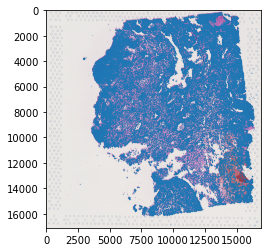

In [7]:
# plot nuclei center on image
plt.scatter(nuclei_coord_df["X"], nuclei_coord_df["Y"], s= 0.01)
plt.imshow(img)

# 3. Perform kmeans algorithm 

In [8]:
# Use elbow method to determine optimal cluster number
inert = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(nuclei_coord_df)
    inert.append(kmeans.inertia_)

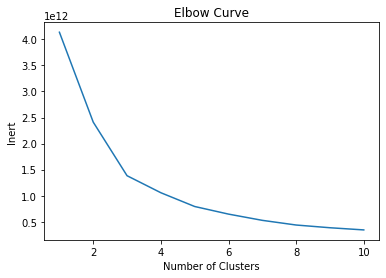

In [9]:
#K_clusters = range(1,10)
#kmeans = [KMeans(n_clusters=i) for i in K_clusters]
#Y_axis = nuclei_coord_df[['Y']]
#X_axis = nuclei_coord_df[['X']]
#score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(range (1,11), inert)
plt.xlabel('Number of Clusters')
plt.ylabel('Inert')
plt.title('Elbow Curve')
plt.show()

## n_clusters = 3, init = k-means++, n_init = 10

In [21]:
# Cluster K-means
model = KMeans(n_clusters = 3)
model.fit(nuclei_coord_df)

KMeans(n_clusters=3)

In [22]:
model.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [23]:
centroids = model.cluster_centers_
centroids

array([[12624.38228631,  3801.96667302],
       [12317.4881083 , 11850.08127244],
       [ 6114.59287864,  5820.75042043]])

In [24]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
print(centroids_x, centroids_y)

[12624.38228631 12317.4881083   6114.59287864] [ 3801.96667302 11850.08127244  5820.75042043]


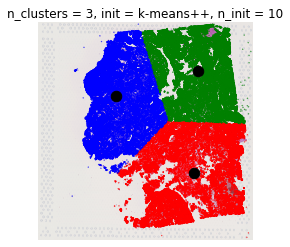

In [25]:
colorL = np.array(["green", "red", "blue"])
plt.scatter(nuclei_coord_df["X"], nuclei_coord_df["Y"], c= colorL[model.labels_], s = 0.1)
plt.scatter(centroids_x, centroids_y, c = "black", s = 110)
plt.title("n_clusters = 3, init = k-means++, n_init = 10", fontsize = 12)
plt.axis("off")
plt.imshow(img)

## n_clusters = 3, init =random, n_init = 100

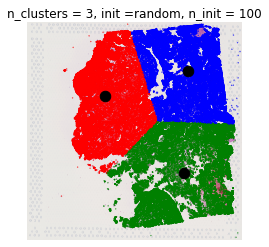

In [15]:
model2 = KMeans(n_clusters = 3, init ="random", n_init = 100)
model2.fit(nuclei_coord_df)

# Centroids coordinates
centroids = model2.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Visualization
colorL = np.array(["green", "red", "blue"])
plt.scatter(nuclei_coord_df["X"], nuclei_coord_df["Y"], c= colorL[model2.labels_], s = 0.1)
plt.scatter(centroids_x, centroids_y, c = "black", s = 110) # plot centroids
plt.title("n_clusters = 3, init =random, n_init = 100", fontsize = 12)
plt.axis("off")
plt.imshow(img)

## n_clusters = 3, init =k-means++, n_init = 100

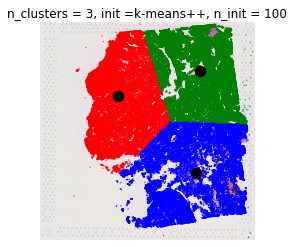

In [16]:
model3 = KMeans(n_clusters = 3, init ="k-means++", n_init = 100)
model3.fit(nuclei_coord_df)

# Centroids coordinates
centroids = model3.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Visualization
colorL = np.array(["green", "red", "blue"])
plt.scatter(nuclei_coord_df["X"], nuclei_coord_df["Y"], c= colorL[model3.labels_], s = 0.1)
plt.scatter(centroids_x, centroids_y, c = "black", s = 110) # plot centroids
plt.title("n_clusters = 3, init =k-means++, n_init = 100", fontsize = 12)
plt.axis("off")
plt.imshow(img)

## n_clusters = 7, init =k-means++, n_init = 100

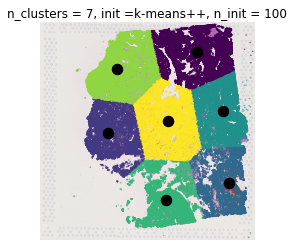

In [17]:
model4 = KMeans(n_clusters = 7, init ="k-means++", n_init = 100)
model4.fit(nuclei_coord_df)

# Centroids coordinates
centroids = model4.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Visualization
colorL = np.array(["green", "red", "blue"])
plt.scatter(nuclei_coord_df["X"], nuclei_coord_df["Y"], c= model4.labels_, s = 0.1)
plt.scatter(centroids_x, centroids_y, c = "black", s = 110)  # plot centroids
plt.title("n_clusters = 7, init =k-means++, n_init = 100", fontsize = 12)
plt.axis("off")
plt.imshow(img)

## n_clusters = 15, init =k-means++, n_init = 100

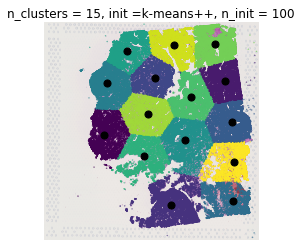

In [18]:
model5 = KMeans(n_clusters = 15, init ="k-means++", n_init = 100)
model5.fit(nuclei_coord_df)

# Centroids coordinates
centroids = model5.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Visualization
colorL = np.array(["green", "red", "blue"])
plt.scatter(nuclei_coord_df["X"], nuclei_coord_df["Y"], c= model5.labels_, s = 0.1)
plt.scatter(centroids_x, centroids_y, c = "black", s = 50)  # plot centroids
plt.title("n_clusters = 15, init =k-means++, n_init = 100", fontsize = 12)
plt.axis("off")
plt.imshow(img)